In [39]:
import requests
import json

response_data = None

try:
    r = requests.get('https://covid-19sl.s3-ap-northeast-1.amazonaws.com/data.json')
    r.raise_for_status()
    response_data = json.loads(r.content)
except requests.exceptions.HTTPError as e:
    print(e.response.text)



In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime

daily_covid_cases = response_data['daily']
confirmed_data_to_process = []
recovered_data_to_process = []
last_value = 0

for d in daily_covid_cases:
    day_of_year = datetime.strptime(d['date'], '%Y-%m-%d').timetuple().tm_yday

    daily_total_cases = last_value if not d['confirmed'] else int(d['confirmed'])
    daily_cases = daily_total_cases - last_value
    last_value = daily_total_cases
    confirmed = {
        'day_of_year': day_of_year,
        'daily_cases': daily_cases
    }
    confirmed_data_to_process.append(confirmed)

dataset = pd.json_normalize(data_to_process)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

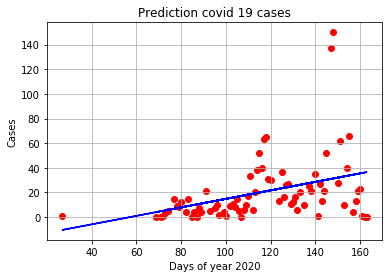

In [42]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.rcParams['axes.grid'] = True
plt.title('Prediction covid 19 cases')
plt.xlabel('Days of year 2020')
plt.ylabel('Cases')
plt.show()

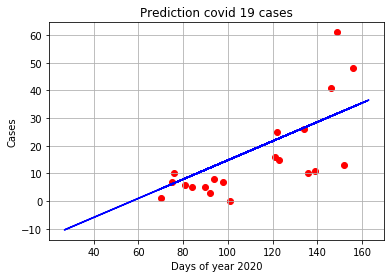

In [43]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.rcParams['axes.grid'] = True
plt.title('Prediction covid 19 cases')
plt.xlabel('Days of year 2020')
plt.ylabel('Cases')
plt.show()

In [44]:
_x = []
_y = []
last_reported_date = max(X_train)[0]

start = last_reported_date
for i in range(50):
    start += 1
    _x.append(start)
    predict_val = regressor.predict([[start]])
    _y.append(predict_val)

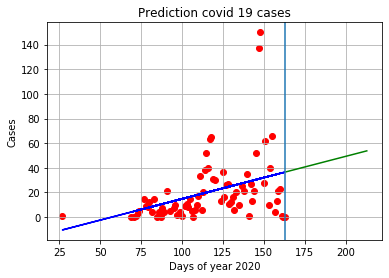

In [45]:


#plt.scatter(_x, _y, color='green')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.axvline(last_reported_date)
plt.plot(_x, _y, color='green')
plt.rcParams['axes.grid'] = True
plt.title('Prediction covid 19 cases')
plt.xlabel('Days of year 2020')
plt.ylabel('Cases')
plt.show()